## Projeto de Machine Learning / Machine Learning Project

**Objetivo**: Através dos Dados do Censo detectar se a renda da pessoa excede o valor de 50 mil dólares por ano.

**Objective**: Through Census Data detects if the people income exceeds the fifty thousand dollars a year

**Dataset**: O conjunto de dados para este projeto é originário do Repositório de Aprendizado de Máquina da UCI (https://archive.ics.uci.edu/ml/datasets/Adult)

**Dataset**: The dataset that I use in that project is From Machine Learning UCI repository (https://archive.ics.uci.edu/ml/datasets/Adult)

### Importando as bibliotecas / Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import NearMiss
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import joblib

### Colunas do Dataset / Dataset Columns

**age**: Idade.

**workclass**: Classe trabalhadora. Se a pessoa é funcionário público, autônomo, empresário etc.

**education**: Níveis de Escolaridade.

**education-num**: Código do Nível de Escolaridade.

**marital-status**: Estado Civil.

**occupation**: Ocupação (Suporte técnico, Conserto de arte, Outros serviços, Vendas, Exec-managerial, Prof-specialty, Manipuladores de limpeza, Machine-op-inspct, Adm-clerical, Pesca agropecuária, Transport-moving, Priv-house-serv, Serviço de Proteção, Forças Armadas)

**relationship**: Relacionamento (Esposa, Filha Própria, Marido, Não-familiar, Outro-parente, Solteira.)

**race**: Raça (Preto, branco, asiático-Pac-Islander, Amer-Indian-Eskimo, Outro.)

**sex**: Sexo(Feminino, Masculino).

**capital-gain**: Ganho de Capital.

**capital-loss**: Perda de Capital.

**hours-per-week**: Horas de trabalho por Semana.

**native-country**: País Nativo (Estados Unidos, Camboja, Inglaterra, Porto Rico, Canadá, Alemanha, EUA (Guam-USVI-etc), Índia, México, Portugal etc)

In [2]:
ds = pd.read_csv('adult.data')

In [3]:
ds.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


- Se eu não utilizar o na_values='?', quanto for buscar por valores nulos não haverá nenhum, e meu modelo de machine learning será bem inviezada, pois não pegarei todos os valores nulos

- Utilizo o chunksize para a conseguir trablhar com o melhor desempenho com dados grandes
--------------------------------------------------------------------------------------------------------------------------

- If I do not use na_values='?', when I search for null values, I will not find it, and my Machine Learning will be unbiased

- I am using the chunksize to work with large datasets

In [4]:
ds = pd.DataFrame()
for chunk in pd.read_csv('adult.data',na_values= '?', chunksize=10000):
    ds = pd.concat([ds, chunk])

## Analise de dados / Data Analysis

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   education        48842 non-null  object
 3   educational-num  48842 non-null  int64 
 4   marital-status   48842 non-null  object
 5   occupation       46033 non-null  object
 6   relationship     48842 non-null  object
 7   race             48842 non-null  object
 8   sex              48842 non-null  object
 9   capital-gain     48842 non-null  int64 
 10  capital-loss     48842 non-null  int64 
 11  hours-per-week   48842 non-null  int64 
 12  native-country   47985 non-null  object
 13  income           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [6]:
ds.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
# Descrição de váriaveis categóricas
# description of the categorical variables
ds.describe(include=['O'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [8]:
ds["income"].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

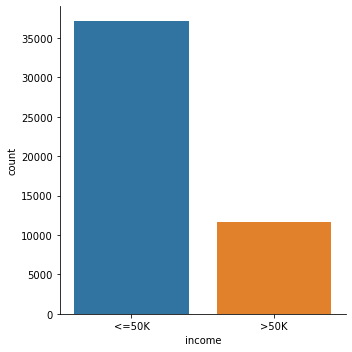

In [9]:
sns.catplot(x="income",kind="count",data=ds,orient="h")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '11th'),
  Text(1, 0, 'HS-grad'),
  Text(2, 0, 'Assoc-acdm'),
  Text(3, 0, 'Some-college'),
  Text(4, 0, '10th'),
  Text(5, 0, 'Prof-school'),
  Text(6, 0, '7th-8th'),
  Text(7, 0, 'Bachelors'),
  Text(8, 0, 'Masters'),
  Text(9, 0, 'Doctorate'),
  Text(10, 0, '5th-6th'),
  Text(11, 0, 'Assoc-voc'),
  Text(12, 0, '9th'),
  Text(13, 0, '12th'),
  Text(14, 0, '1st-4th'),
  Text(15, 0, 'Preschool')])

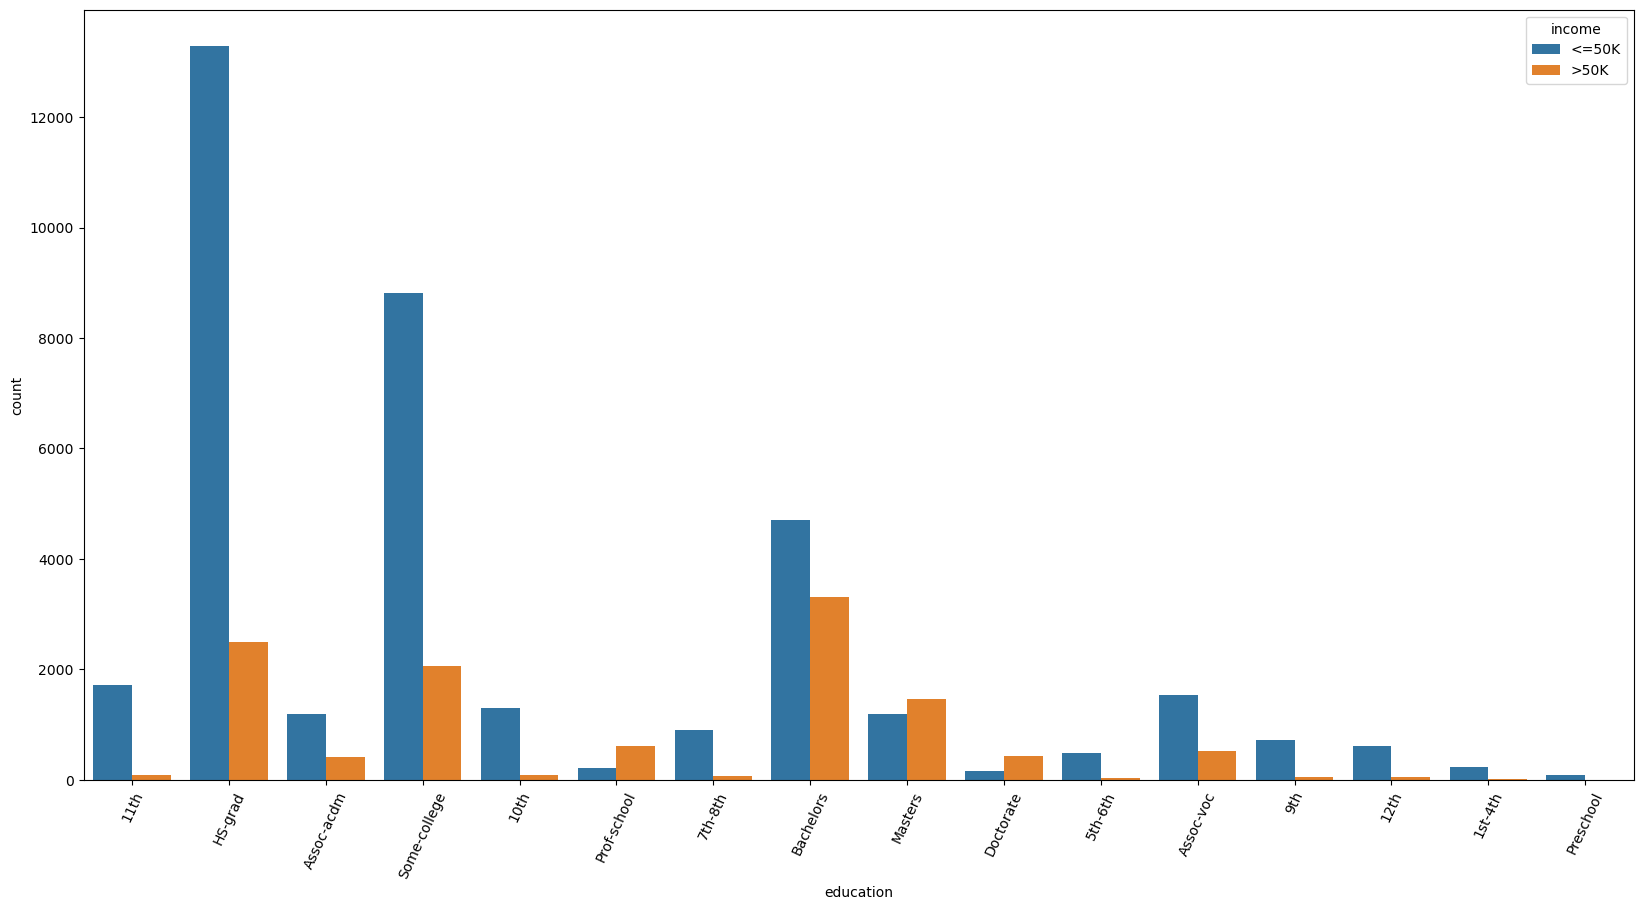

In [10]:
plt.figure(figsize=(20,10))
sns.countplot(data=ds,x="education", hue="income")
plt.xticks(rotation=65)

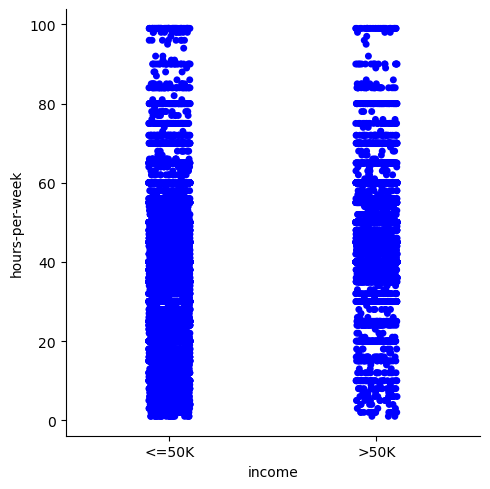

In [11]:
sns.catplot(x='income',y='hours-per-week',color='b',data=ds)

<AxesSubplot:xlabel='sex', ylabel='count'>

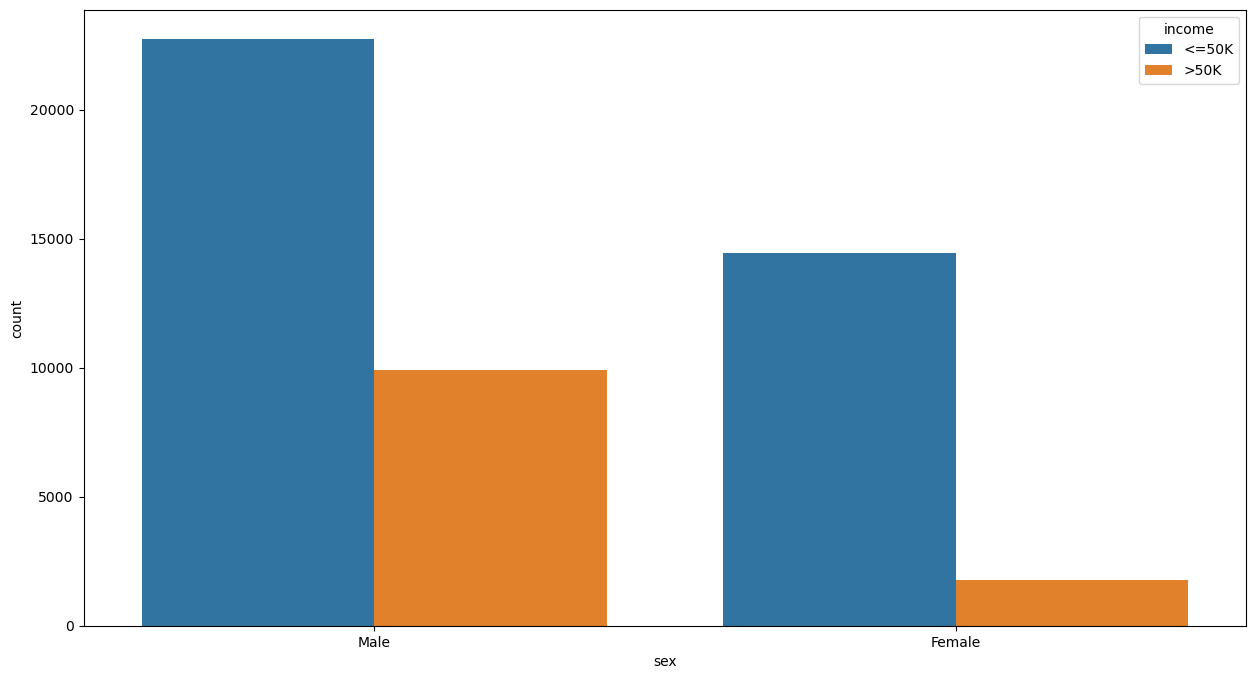

In [12]:
plt.figure(figsize=(15,8))
sns.countplot(x="sex",hue="income",data=ds)

<AxesSubplot:xlabel='hours-per-week', ylabel='count'>

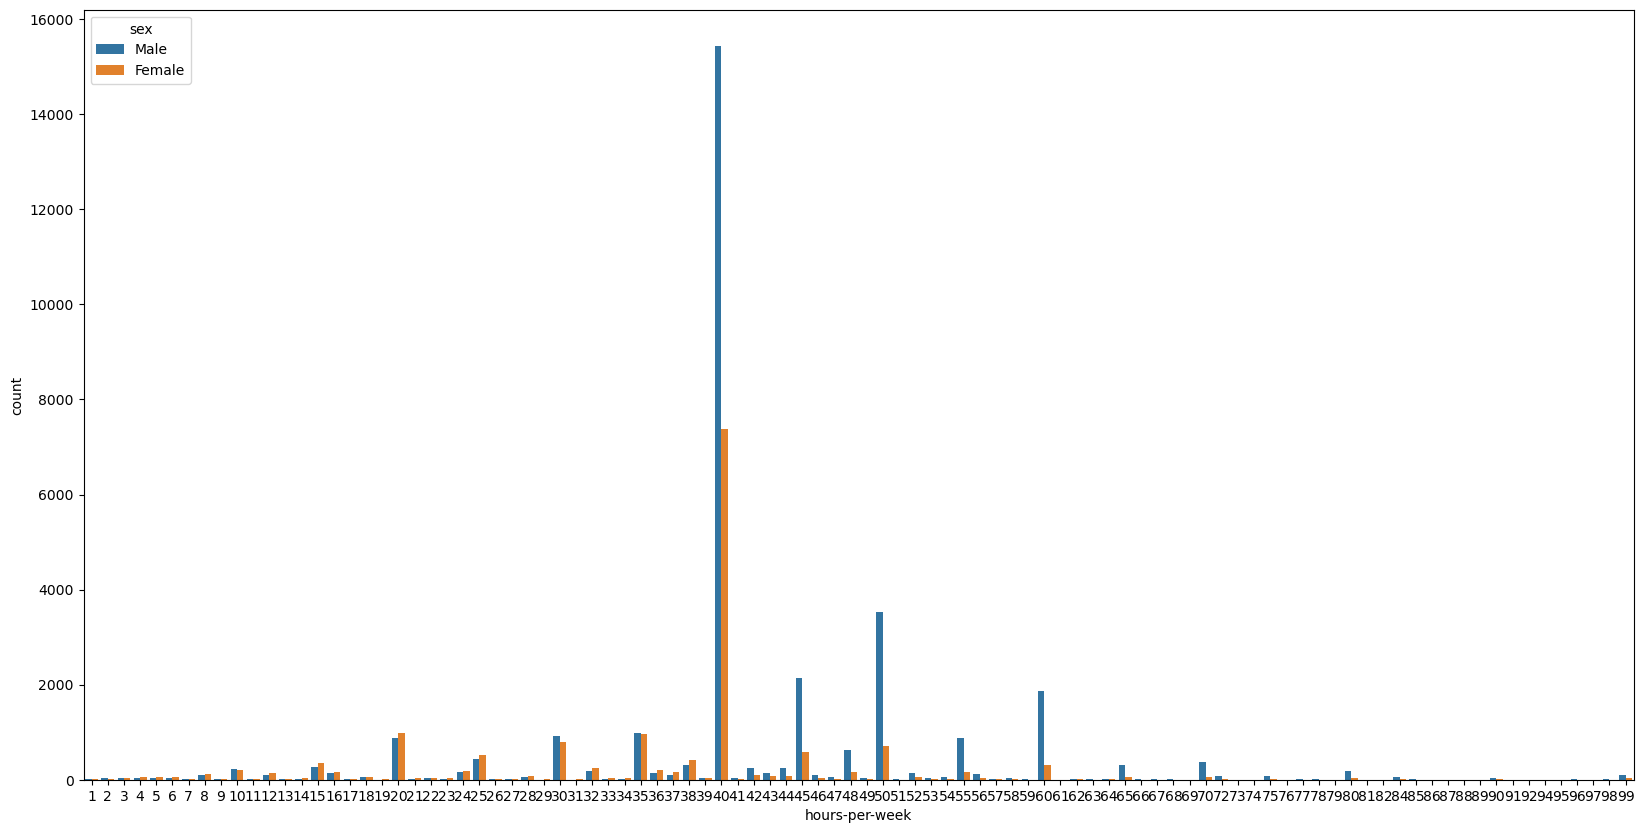

In [13]:
plt.figure(figsize=(20, 10))
sns.countplot(x="hours-per-week",hue="sex",data=ds)

<AxesSubplot:xlabel='age', ylabel='count'>

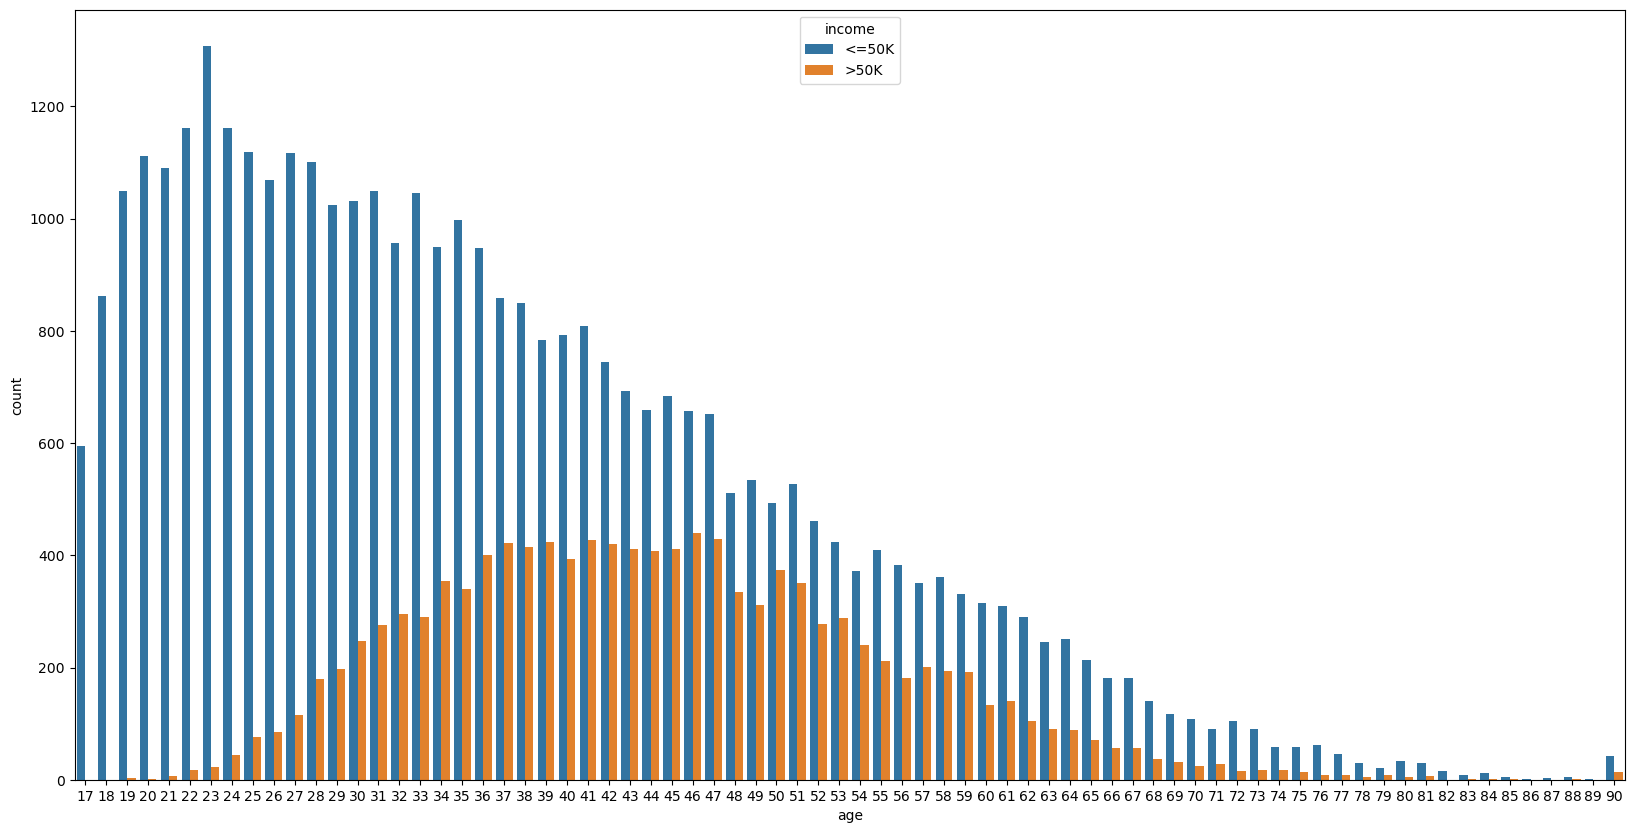

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(x="age",hue="income",data=ds)

### Alguns insights / Some Insights

- Quem tem High school ou some college tem uma probabilidade baixa de ganhar acima dos 50k anuais
- Há uma tendência de quem ganha acima igual ou acima de 50k trabalhar entre 37 a 60 horas semanais
- Até 37 horas se ve uma dominancia pelas mulheres, passando de 38 horas os homens costumam trabalhar mais
- Se vc tiver prof school, masters degree or doctorate a chance de ganhas mais de 50k aumenta
- Você tera mais chance se tive entre 34 anos a 51 anos de  ganhar 50k 

--------------------------------------------------------------------------------------------------------------------------

- People who has high school degree or some college has a low probability to achieve =>50k annual salary
- There are a trend that who has a salary iqual or over 50k work between 37 to 60 hours
- The graph show us that women has dominance work up to 38 hours per week, after that, the number of men working per week grow
- Prof school, master degree and doctorate increases the chance to have a salay over 50k
- to 34 to 51 years old the chances of earning over 50k increase

<AxesSubplot:>

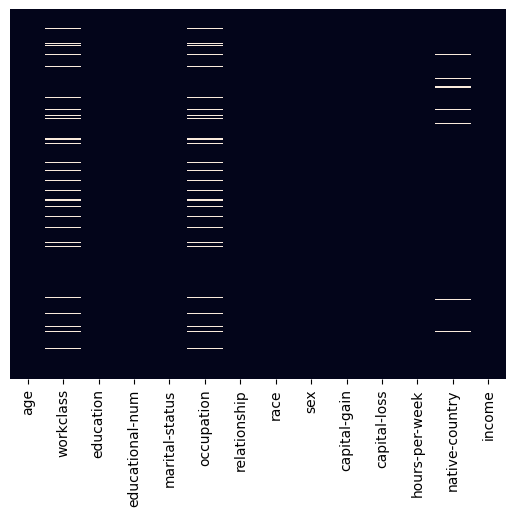

In [15]:
# Verificando dados nulos
# Checking null data
sns.heatmap(ds.isnull(),yticklabels=False,cbar=False)

In [16]:
ds.isnull().sum()

age                   0
workclass          2799
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
sex                   0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [17]:
ds['workclass']=ds['workclass'].fillna(ds['workclass'].mode()[0])
ds['occupation']=ds['occupation'].fillna(ds['occupation'].mode()[0])
ds['native-country']=ds['native-country'].fillna(ds['native-country'].mode()[0])

## Transformando dados categoricos em númericos 
## Change categorical features to numerical

In [18]:
def remove_features(lista_features):
    for i in lista_features:
        ds.drop(i, axis=1, inplace=True)
        return 0

In [19]:
ds["to-capital"] = ds["capital-gain"] - ds["capital-loss"]
remove_features(['capital-gain'])
remove_features(['capital-loss'])

0

In [20]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   education        48842 non-null  object
 3   educational-num  48842 non-null  int64 
 4   marital-status   48842 non-null  object
 5   occupation       48842 non-null  object
 6   relationship     48842 non-null  object
 7   race             48842 non-null  object
 8   sex              48842 non-null  object
 9   hours-per-week   48842 non-null  int64 
 10  native-country   48842 non-null  object
 11  income           48842 non-null  object
 12  to-capital       48842 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 4.8+ MB


- Utilizarei o  Label encoder pois ele gera valores unicos,o onehotencoder traz varios valores multiplicando ou triplicando as colunas, como ja tenho  um dataset  grande ultilizar o (ohe) só diminuira minha performace por ser bastante pesado, e é o que eu preciso para subistituir os valores categoricos neste dataset

---------------------------------------------------------------------------------------------------------------------------
- I will use the Label Encoder, it generates unique values. The OneHotEncoder bring to us new values multiplying or tripling the columns, I have a big dataset, so it will decrase my performance for being quite heavy, and the Label Encoder is what I need to replace categorical values

In [21]:
col = ds[ds.select_dtypes(['object']).columns]
lenc = LabelEncoder()
for c in col:
   ds[c] = lenc.fit_transform(list(ds[c].values))

In [22]:
ds.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,to-capital
0,25,3,1,7,4,6,3,2,1,40,38,0,0
1,38,3,11,9,2,4,0,4,1,50,38,0,0
2,28,1,7,12,2,10,0,4,1,40,38,1,0
3,44,3,15,10,2,6,0,2,1,40,38,1,7688
4,18,3,15,10,4,9,3,4,0,30,38,0,0


### Utilizando modelos de Machine Learning nos meus dados
### Utilizing Machine Learning Models in my data

In [23]:
#Definindo o X e o y
X = ds.drop('income', axis=1)
y = ds['income']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### prevendo a acurácia com alguns modelos
### predicting the accuracy with different models

In [25]:
svm = svm.SVC().fit(X[:-30],y[:-30])
lr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=3)
tree_clf = DecisionTreeClassifier(random_state=1)
rclf = RandomForestClassifier()

In [26]:
# Criando uma função para avaliar a acurácia
def Accuracy(clf,X,y):
    results = cross_val_predict(clf, X, y, cv=5)
    return metrics.accuracy_score(y,results)

- O melhor modelo é o RandomForest Classifier como podemos ver a comparação de acurácias
- The best model is the Random Forest Classifier we see the comparisson of the accuracy

In [27]:
print("randomForest accuracy:{}".format(Accuracy(rclf,X,y)))
print("decisiontree accuracy:{}".format(Accuracy(tree_clf,X,y)))
print("KNN accuracy:{}".format(Accuracy(knn,X,y)))
print("SVM accuracy:{}".format(Accuracy(svm,X,y)))
print("LinearRegressor accuracy:{}".format(Accuracy(lr,X,y)))

randomForest accuracy:0.8478563531386921
decisiontree accuracy:0.8220588837475943
KNN accuracy:0.8346914540764097
SVM accuracy:0.802526514065763


C:\Users\LuisFS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LuisFS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

LinearRegressor accuracy:0.8045329839072929


C:\Users\LuisFS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Vendo se com as features importances o modelo sai bem melhor
### Trying the most important features to see if the model runs better

#### Procurando pelas melhores features
#### searching for the best  features

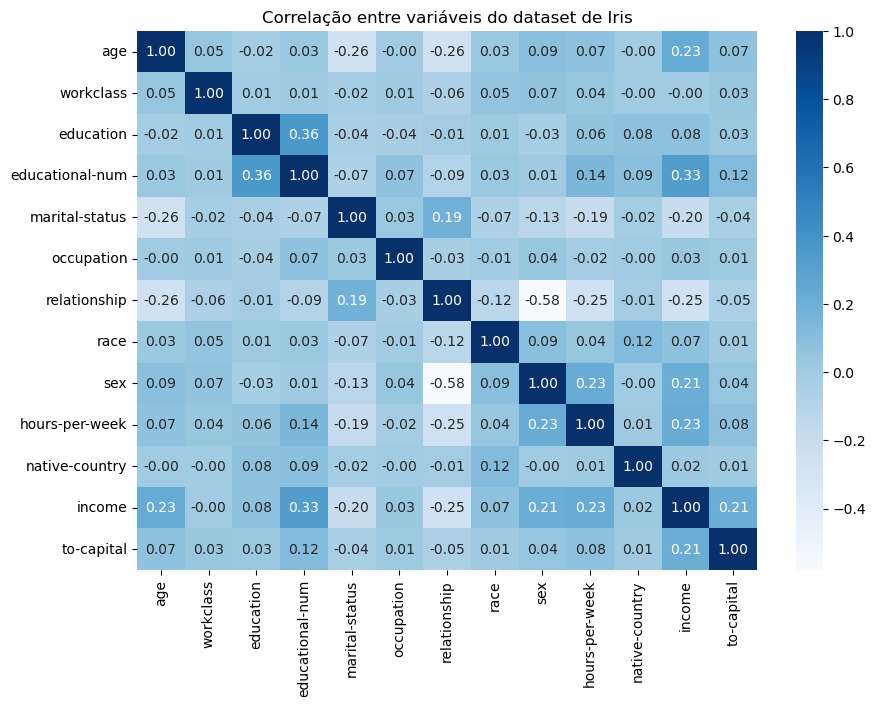

In [28]:
plt.figure(figsize=(10, 7))
sns.heatmap(ds.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de Iris')
plt.show()

In [29]:
rclf=RandomForestClassifier(n_estimators=100, random_state=7)
rclf.fit(X, y)

RandomForestClassifier(random_state=7)

In [30]:
rclf.feature_importances_

array([0.21682482, 0.04645093, 0.03234145, 0.101229  , 0.08155968,
       0.08006267, 0.10981341, 0.01763707, 0.01274545, 0.11396333,
       0.01964498, 0.16772721])

In [31]:
feature_imp = pd.Series(rclf.feature_importances_,index=X.columns).sort_values(ascending=False)

In [32]:
feature_imp

age                0.216825
to-capital         0.167727
hours-per-week     0.113963
relationship       0.109813
educational-num    0.101229
marital-status     0.081560
occupation         0.080063
workclass          0.046451
education          0.032341
native-country     0.019645
race               0.017637
sex                0.012745
dtype: float64

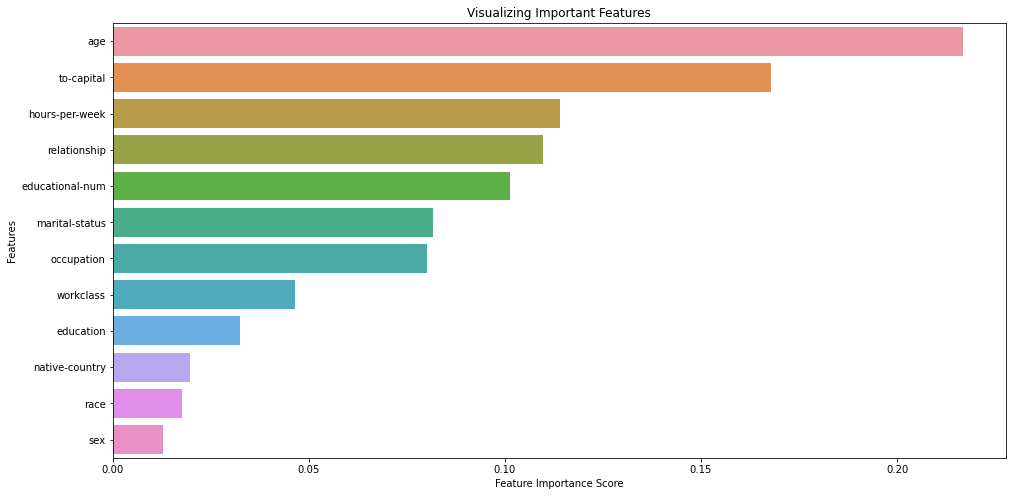

In [33]:
def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()
visualiza_features_importantes(feature_imp)

#### Selecionando as melhores feature com a melhor pontuação
#### Selecting the best features for up a certain score

In [34]:
select_fea = []
for feature, importance in feature_imp.iteritems():
    if importance > 0.03:
        print("{}:\t{}".format(feature, importance))
        select_fea.append(feature)

age:	0.21682482015654217
to-capital:	0.16772720888354464
hours-per-week:	0.11396332768086812
relationship:	0.10981340936048435
educational-num:	0.10122899978700349
marital-status:	0.08155968471739791
occupation:	0.08006266720762309
workclass:	0.0464509250574721
education:	0.03234145081235199


#### Separando as features para o treino e teste
#### separating features for training and test

In [35]:
X_imp = ds[select_fea]
y_imp = ds["income"]

### Checking the accuracy of 5 chosen models
### Verificando a acurácia dos 5 modelos escolidos

In [36]:
# instanciando o objeto classificador
# instantiating the object classifier
rclf_imp = RandomForestClassifier(random_state=1, n_estimators=100)
tree_clf_imp = DecisionTreeClassifier(random_state=1)
knn_imp = KNeighborsClassifier(n_neighbors=3)
lr_imp = LogisticRegression()

In [37]:
print("randomForest accuracy:{}".format(Accuracy(rclf,X_imp,y_imp)))
print("decisiontree accuracy:{}".format(Accuracy(tree_clf,X_imp,y_imp)))
print("KNN accuracy:{}".format(Accuracy(knn,X_imp,y_imp)))
print("SVM accuracy:{}".format(Accuracy(svm,X_imp,y_imp)))
print("LinearRegressor accuracy:{}".format(Accuracy(lr,X_imp,y_imp)))

randomForest accuracy:0.8470783342205479
decisiontree accuracy:0.8233282830350928
KNN accuracy:0.836820769010278
SVM accuracy:0.802526514065763


C:\Users\LuisFS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LuisFS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

LinearRegressor accuracy:0.7997829736702019


C:\Users\LuisFS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 - Mesmo utilizando a feature importance o modelo trabalha melhor com todas as colunas, não apenas com as consideradas mais importantes
 - O modelo que ganho foi o RandomForestClassifier
---------------------------------------------------------------------------------------------------------------------------
- Even using the feature importance the model works better with all the columns of the dataset, not just the ones considered most important
- the model that won was the RandomForestClassifier

## Avaliando os resultados do modelo
## Evaluate the model results

- Escoli o RandomForestClassifier e o DecisionTreeClassifier pois são os dois modelo que mais se equilibram ao resultado da acuracia

- E com uma diferença muito pequena na acuracia o RandommForest foi o escolido

---------------------------------------------------------------------------------------------------------------------------

- I chosse the Random Forest Classifier and the Decission Tree Classifier because both are the most balanced among to the result of accuracy

- Random Forest Classifier was the best with a minimum difference

In [38]:
clf = rclf.fit(X, y)
tree_clf = tree_clf.fit(X, y)

In [39]:
print("RandomForest accuracy:{}".format(Accuracy(clf,X,y)))
print("DecissionTree accuracy:{}".format(Accuracy(tree_clf,X,y)))

RandomForest accuracy:0.8475082920437329
DecissionTree accuracy:0.8220588837475943


- os algoritmos de Machine Learning têm melhor desempenho ou convergem mais rápido quando os recursos estão em uma escala relativamente semelhante e/ou próximo da distribuição normal.
- Preciso padronizar os algoritmos para não haver variancia nos dados quando usarmos o modelo
- O Scaler superou os outros parametros 
---------------------------------------------------------------------------------------------------------------------------
- machine learning algorithms perform better or converge faster when features are on a relatively similar scale and/or close to normally distributed.
- I need to standardize the algorithms so there is no variance in the data when we use the model
- The Scaler suprassed the other models

In [40]:
# testei 2 padronizadores nos dados para ver a diferença na acurácia nos dados do meu melhor modelo
# I tested 2 standardizers on the data to see the difference in accuracy in the data of my best model

# Pipeline com o pré-processador  StandardScaler
# Pipelne with StanardScaler preprocessor:
pip_scaler = Pipeline([ ('scaler', StandardScaler()),('clf', RandomForestClassifier())])

# Pipeline com o pré-processador  MinMaxScaler:
# Pipeline with MinMaxScaler preprocessor:
pip_min_max = Pipeline([ ('min_max_scaler', MinMaxScaler()),('clf', RandomForestClassifier())])

print("scaler accuracy:{}".format(Accuracy(pip_scaler,X,y)))
print("min_max accuracy:{}".format(Accuracy(pip_min_max,X,y)))

scaler accuracy:0.8481839400515949
min_max accuracy:0.8488800622415135


### Tuning  do modelo buscando os melhores parametros para um melhor desempenho
### Model Tuning searching for the best parameters for a better performance

- Os parâmetros:
- The Parameters:
   - n_estimators
   - criterion
   - max_depth
   - min_sample_split
   - min_sample_leaf

In [41]:
# Alguns valores estimados ou a quantidade de arvores da floresta
# Some estimate values or number of trees in the forest
estimators_values = [10, 20, 50, 100, 150]

# Valores para o critério de divisão
# Values for division criterion
criterion_values = ['gini', 'entropy']

# valores de profundidade maxima da árvore
# Max_depth values of the tree
max_depth_values = [10, 20, 50, 100]

# Valores do parâmetro min_sample_spit e min_sample_leaf
# Values of Min_sample_split and mon_sample_leaf parameters
min_samples_split_values = [2, 5, 10, 15]
min_samples_leaf_values = [1, 5, 10, 15]

# Dicionário para receber todos os valores e parametros acima
# Dictionary to receive all the parameters and values above
parametros_grid = dict(clf__n_estimators=estimators_values,
                       clf__criterion=criterion_values,
                       clf__max_depth=max_depth_values,
                       clf__min_samples_split=min_samples_split_values,
                       clf__min_samples_leaf=min_samples_leaf_values)

# Visualizando o dicionário
# viewing the dictionary
parametros_grid

{'clf__n_estimators': [10, 20, 50, 100, 150],
 'clf__criterion': ['gini', 'entropy'],
 'clf__max_depth': [10, 20, 50, 100],
 'clf__min_samples_split': [2, 5, 10, 15],
 'clf__min_samples_leaf': [1, 5, 10, 15]}

In [42]:
# Instanciando o GridSeach com o modelo que vou utilizar, parametros de fold e scoring
# Instantiating the GridSeach with the model I'm going to use, fold and scoring parameters
grid = GridSearchCV(pip_scaler, parametros_grid, cv=5, scoring='accuracy')

In [43]:
# Aplicando o grid nos dados de treino e Classe
# Applying the grid on training and class datas
grid.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', RandomForestClassifier())]),
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [10, 20, 50, 100],
                         'clf__min_samples_leaf': [1, 5, 10, 15],
                         'clf__min_samples_split': [2, 5, 10, 15],
                         'clf__n_estimators': [10, 20, 50, 100, 150]},
             scoring='accuracy')

In [44]:
# O melhor score
# The best Score
grid.best_score_

0.8645429696253732

- Usarei o StandardScaler
- I will use the StandardScaler

In [45]:
# Imprimindo os scores por combinação
# Printing the scores by combination
grid.cv_results_

{'mean_fit_time': array([0.20692139, 0.38281727, 1.04431539, 1.83205042, 2.73594289,
        0.2256948 , 0.42637978, 0.99942555, 1.8536963 , 2.82151237,
        0.21973848, 0.39446592, 0.9278482 , 1.91319737, 2.8808023 ,
        0.20133276, 0.38242798, 0.93110647, 1.88624706, 2.71432066,
        0.20038815, 0.38165298, 0.90281448, 1.82017188, 2.72674732,
        0.19837141, 0.37500548, 0.9196979 , 1.82397127, 2.80584459,
        0.1953907 , 0.37538414, 0.91954679, 1.87098913, 2.75420356,
        0.19777918, 0.37674074, 0.90465794, 1.91988049, 2.69753332,
        0.19510398, 0.37190733, 0.89861131, 1.89530315, 2.69936366,
        0.19619575, 0.3739923 , 0.92980485, 1.86472468, 2.69086547,
        0.19171405, 0.38891253, 0.90091147, 1.85903053, 2.71696997,
        0.2031435 , 0.3936605 , 0.99559636, 1.85226269, 2.80588307,
        0.22204309, 0.41288819, 0.91256351, 1.83141479, 2.87898645,
        0.19787207, 0.37816753, 0.91115832, 1.80241547, 2.97265558,
        0.21876717, 0.4929359 ,

In [46]:
# Os melhores parametros
# The best parameters
grid.best_params_

{'clf__criterion': 'entropy',
 'clf__max_depth': 20,
 'clf__min_samples_leaf': 1,
 'clf__min_samples_split': 10,
 'clf__n_estimators': 100}

In [47]:
best_params = grid.best_params_
best_params

{'clf__criterion': 'entropy',
 'clf__max_depth': 20,
 'clf__min_samples_leaf': 1,
 'clf__min_samples_split': 10,
 'clf__n_estimators': 100}

### Finalizando o modelo com os melhores parametros
### Finalizing the model with the best parameters

In [48]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [53]:
r_forest = RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=1,
                                  min_samples_split=10, n_estimators=100)

In [54]:
r_forest.fit(X,y)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=10)

In [55]:
rforest_result = cross_val_predict(r_forest, X, y, cv=10)
print(metrics.classification_report(y,rforest_result))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     37155
           1       0.77      0.62      0.69     11687

    accuracy                           0.86     48842
   macro avg       0.83      0.78      0.80     48842
weighted avg       0.86      0.86      0.86     48842



In [56]:
joblib.dump(r_forest, 'model.pkl')

['model.pkl']

In [57]:
joblib.load('model.pkl')

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=10)